다음 url을 이용하여 서경대학교를 네이버에서 검색한 후,
그 결과를  형태소 분석하여, 명사로만 
워드클라우드로 시각화 

url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query="+keyword

In [70]:
import urllib.parse
import urllib.request

keyword = '서경대학교'
keyword = urllib.parse.quote(keyword)

url = "https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query="+keyword

d = urllib.request.urlopen(url)

if d.status != 200:
    print('실패')
    exit(0)

http_body = d.read().decode("utf-8 ")

In [71]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(http_body, 'html.parser')

html_body = soup.find('body')
search_results = soup.find_all('a', class_='dsc_link')

In [72]:
from konlpy.tag import Kkma
a = Kkma()
my_nouns = []

for s in search_results:
    my_nouns.append(s.get_text())

In [73]:
result_list = a.nouns('\n'.join(my_nouns))
result_list = [n for n in result_list if len(n)>1]

result_text = '\n'.join(result_list)

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

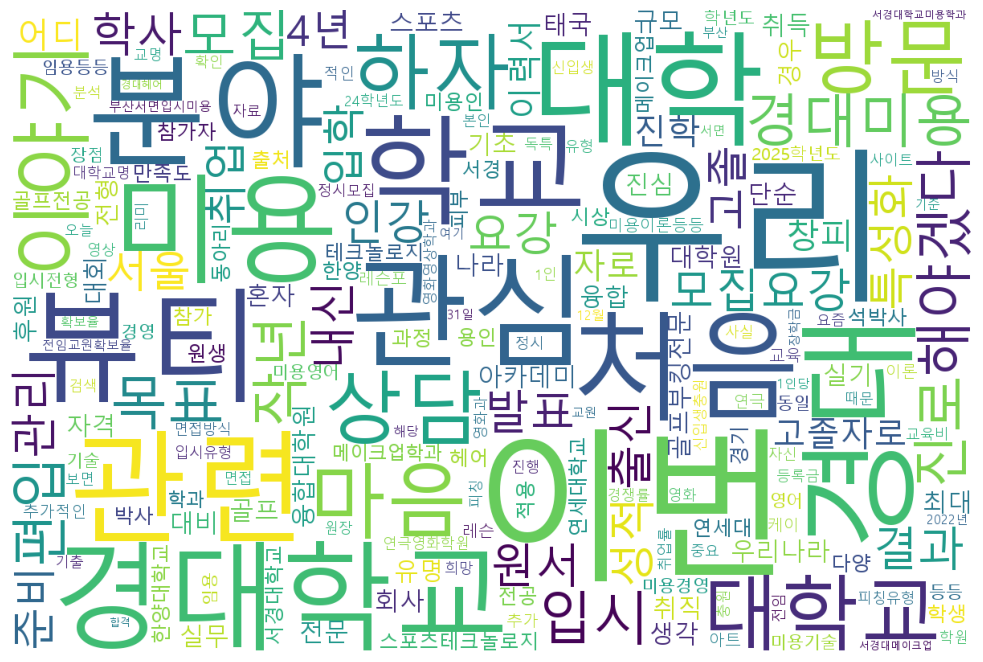

In [75]:
wordcloud = WordCloud(max_font_size = 200,
                     font_path='c:/Windows/fonts/malgun.ttf',
                      background_color='#FFFFFF',
                      random_state = 50,
                      width=1200,
                      height=800
                     ).generate(result_text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')

plt.show()